In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

In [5]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
print(X.shape)
X

(32561, 5)


,2,4,10,11,12
0,77516,13,2174,0,40
1,83311,13,0,0,13
2,215646,9,0,0,40
3,234721,7,0,0,40
4,338409,13,0,0,40
...,...,...,...,...,...
32556,257302,12,0,0,38
32557,154374,9,0,0,40
32558,151910,9,0,0,40
32559,201490,9,0,0,20


In [8]:
#data[14][32560]
y.value_counts()

14
0    24720
1     7841
Name: count, dtype: int64

In [9]:
1 - y[y==1].count()/y.shape[0]

0.7591904425539756

In [10]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0
                                # ,loss='exponential'
                                ).fit(X,y)

In [ ]:
(clf.predict(X)==y).sum()/y.shape[0]

0.8568840023340807

In [ ]:
q = np.array([(p==y).sum()/y.shape[0] for p in clf.staged_predict(X)])
q

array([0.75919044, 0.75919044, 0.75919044, 0.80393723, 0.80393723,
       0.81047879, 0.81047879, 0.81459415, 0.8149934 , 0.81502411,
       0.81502411, 0.81502411, 0.81508553, 0.81944658, 0.82012223,
       0.82018366, 0.82024508, 0.82291699, 0.82353122, 0.82568103,
       0.82583459, 0.82675594, 0.82687878, 0.82669451, 0.82697092,
       0.82890575, 0.82890575, 0.82866005, 0.82866005, 0.82844507,
       0.82856792, 0.82939713, 0.83031848, 0.83044133, 0.83034919,
       0.83154694, 0.83185406, 0.83188477, 0.83216117, 0.83209975,
       0.83237616, 0.83252971, 0.83259114, 0.83271398, 0.83274469,
       0.8330211 , 0.83338964, 0.83332821, 0.83332821, 0.8332975 ,
       0.83342035, 0.83342035, 0.83366604, 0.83378889, 0.83385031,
       0.8338196 , 0.83378889, 0.83378889, 0.834096  , 0.83443383,
       0.83449526, 0.8346181 , 0.83507878, 0.83507878, 0.83504806,
       0.83535518, 0.83560087, 0.83575443, 0.83569301, 0.83569301,
       0.83569301, 0.83578514, 0.83590799, 0.8359387 , 0.83593

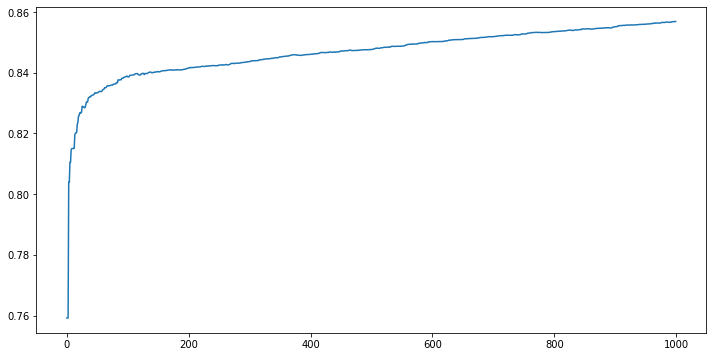

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(q)

In [ ]:
def crossval(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        #print("%s %s" % (train, test))
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = np.array([(p==y_test).sum()/y_test.shape[0] for p in clf.staged_predict(X_test)])
        scor.append(q)
    return np.array(scor)

model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)
q_cv = crossval(X,y,model,5)
q_cv

array([[0.75510517, 0.75510517, 0.75510517, ..., 0.83555965, 0.83555965,
        0.83555965],
       [0.76090295, 0.76090295, 0.76090295, ..., 0.8392199 , 0.8392199 ,
        0.8392199 ],
       [0.75383907, 0.75383907, 0.75383907, ..., 0.83353808, 0.83353808,
        0.83353808],
       [0.75967445, 0.75967445, 0.75967445, ..., 0.83829853, 0.83829853,
        0.83829853],
       [0.7664312 , 0.7664312 , 0.7664312 , ..., 0.83753071, 0.83768428,
        0.83768428]])

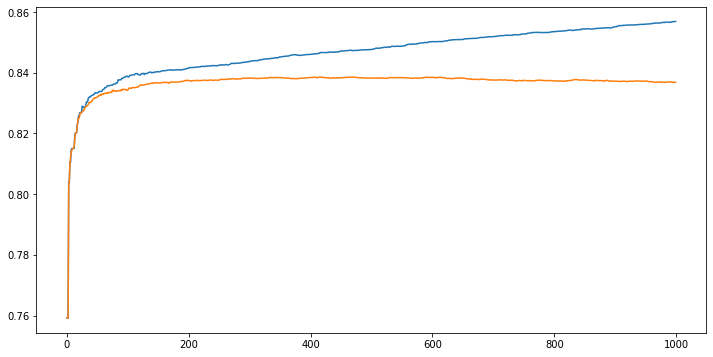

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(q)
plt.plot(q_cv.mean(axis=0))

In [ ]:
def make_grid_sample(d = 1, N = 25):
    xx, yy = np.meshgrid(np.linspace(-d, d, N),
                         np.linspace(-d, d, N))
    z =  np.vstack([xx.ravel(), yy.ravel()]).T
    r = pd.DataFrame(np.vstack([z, z]),columns=['X1','X2'])
    r['Y'] = (2*r.index>=r.shape[0]).astype(int)
    return r
                         
df = make_grid_sample()                         
df

,X1,X2,Y
0,-1.000000,-1.0,0
1,-0.916667,-1.0,0
2,-0.833333,-1.0,0
3,-0.750000,-1.0,0
4,-0.666667,-1.0,0
...,...,...,...
1245,0.666667,1.0,1
1246,0.750000,1.0,1
1247,0.833333,1.0,1
1248,0.916667,1.0,1


In [ ]:
df['Y'].value_counts()

0    961
1    961
Name: Y, dtype: int64

In [ ]:
df['area'] = (df['X1']*df['X1'] - df['X1']*df['X2'] + df['X2']*df['X2'] < 0.7**2).astype(int)
#df['area'] = (df['X1']*df['X1'] + df['X2']*df['X2'] < 0.7**2).astype(int)
df['weight'] = (df['Y']==df['area']).map(lambda x: 0.9 if x else 0.1)
df['area'].value_counts()

0    744
1    506
Name: area, dtype: int64

In [ ]:
df

,X1,X2,Y,area,weight
0,-1.0,-1.0,0,0,0.9
1,-0.9,-1.0,0,0,0.9
2,-0.8,-1.0,0,0,0.9
3,-0.7,-1.0,0,0,0.9
4,-0.6,-1.0,0,0,0.9
...,...,...,...,...,...
877,0.6,1.0,1,0,0.1
878,0.7,1.0,1,0,0.1
879,0.8,1.0,1,0,0.1
880,0.9,1.0,1,0,0.1


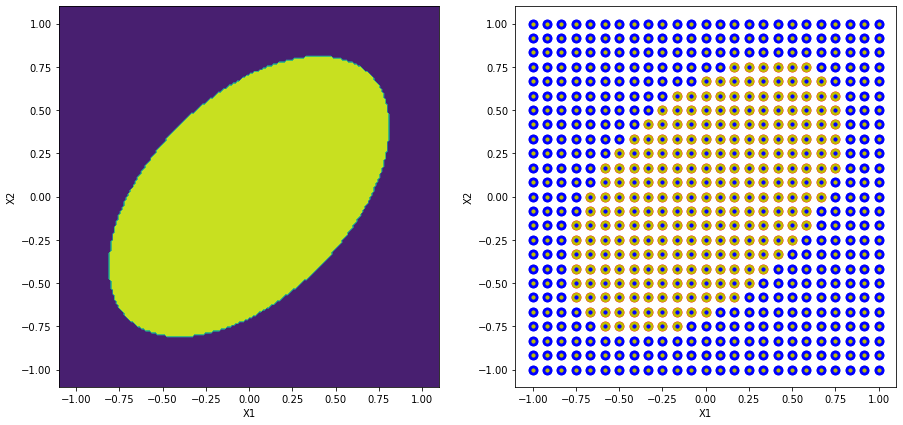

In [ ]:
def plot_sample(ax,df,s1=70,s2=10):
    df.loc[(df['Y']==0)&(df['area']==0)].plot.scatter(x='X1', y='X2',ax=ax,c='b',s=s1+10)
    df.loc[(df['Y']==0)&(df['area']==0)].plot.scatter(x='X1', y='X2',ax=ax,c='b',s=s1)
    df.loc[(df['Y']==1)&(df['area']==1)].plot.scatter(x='X1', y='X2',ax=ax,c='r',s=s1+10)
    df.loc[(df['Y']==1)&(df['area']==1)].plot.scatter(x='X1', y='X2',ax=ax,c='y',s=s1)
    df.loc[(df['Y']==0)&(df['area']==1)].plot.scatter(x='X1', y='X2',ax=ax,c='b',s=s2)
    df.loc[(df['Y']==1)&(df['area']==0)].plot.scatter(x='X1', y='X2',ax=ax,c='y',s=s2)

_,ax = plt.subplots(1,2,figsize=(15,7))
plot_contours(ax[0])
plot_sample(ax[1],df)
plt.savefig('boost_dist_model.png', dpi=150, bbox_inches='tight')

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0
                                # ,loss='exponential'
                                ).fit(df[['X1','X2']],df['Y'],sample_weight=df['weight'])

In [ ]:
list(itertools.islice(clf.staged_decision_function(df[['X1','X2']]),9999,10000))

[array([[-4.77232082],
        [-4.77232082],
        [-4.77232082],
        ...,
        [-4.77232697],
        [-4.77232697],
        [-4.77232697]])]

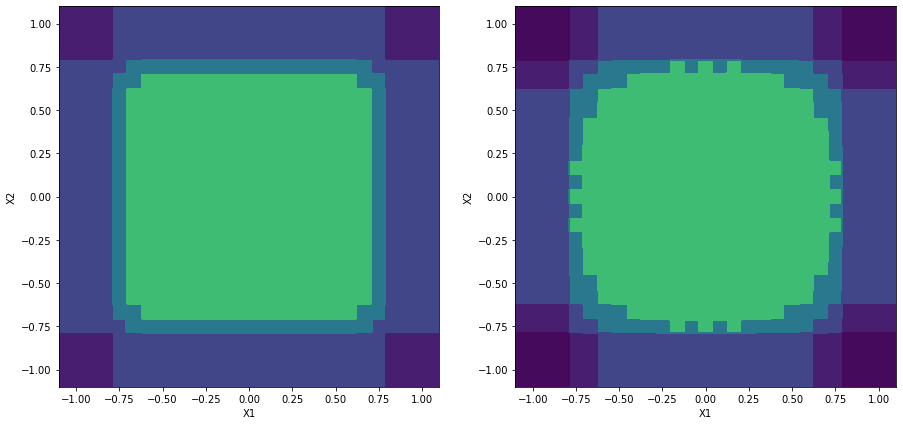

In [ ]:
def plot_contours(ax, clf=None, i=-1, d=1.1,N=201, **params):
    xx, yy = np.meshgrid(np.linspace(-d, d, N),
                         np.linspace(-d, d, N))
    z =  np.vstack([xx.ravel(), yy.ravel()]).T
    X = pd.DataFrame(z,columns=['X1','X2'])
    if clf is None:
        X['weight'] = (X['X1']*X['X1'] - X['X1']*X['X2'] + X['X2']*X['X2'] < 0.7**2).map(lambda x: 0.9 if x else 0.1)
        Z = X['weight'].to_numpy().reshape(xx.shape)
    else:
        #Z = clf.predict(X)
        #Z = list(itertools.islice(clf.staged_decision_function(X),i,i+1))[0]
        #Z = list(itertools.islice(clf.staged_predict_proba(X),i,i+1))[0]
        Z = clf.predict_proba(X)if i<0 else list(itertools.islice(clf.staged_predict_proba(X),i,i+1))[0]
        #r = pd.DataFrame(Z)
        #print(r[0].round(2).value_counts())
        Z = Z[:,1].reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, levels=[0,0.05,0.12,0.3,0.5,0.88,0.95,1],**params)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    return out

_,ax = plt.subplots(1,2,figsize=(15,7))
#plot_contours(ax)
plot_contours(ax[0], clf,15)
plot_contours(ax[1], clf,-1)#, colors=['red','black','blue'])
plt.savefig('boost_dist_sln.png', dpi=150, bbox_inches='tight')

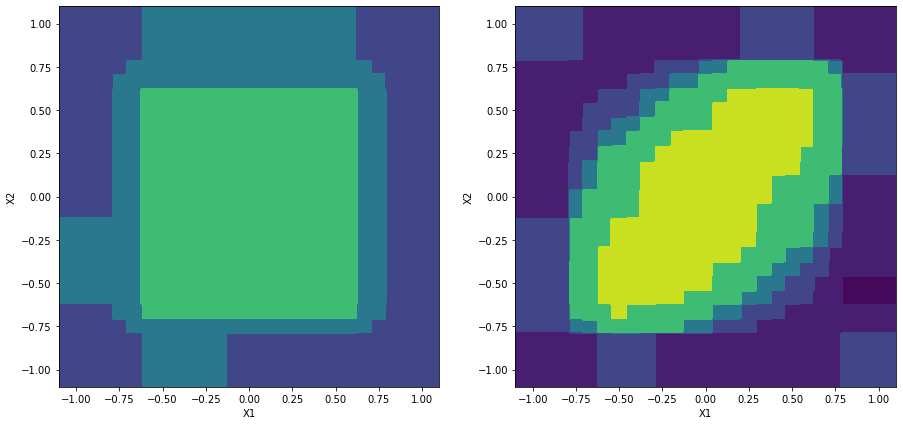

In [ ]:
clf1 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=2, random_state=0
                                 ,loss='exponential'
                                ).fit(df[['X1','X2']],df['Y'],sample_weight=df['weight'])

_,ax = plt.subplots(1,2,figsize=(15,7))
#plot_contours(ax)
plot_contours(ax[0], clf1,15)
plot_contours(ax[1], clf1,-1)#, colors=['red','black','blue'])
plt.savefig('boost_dist_sln_deep.png', dpi=150, bbox_inches='tight')

In [ ]:
df1 = make_grid_sample()    
df1['area'] = (df1['X1'] < 0).astype(int)
df1['weight'] = (df1['Y']==df1['area']).map(lambda x: 0.9 if x else 0.1)
df1['area'].value_counts()

0    650
1    600
Name: area, dtype: int64

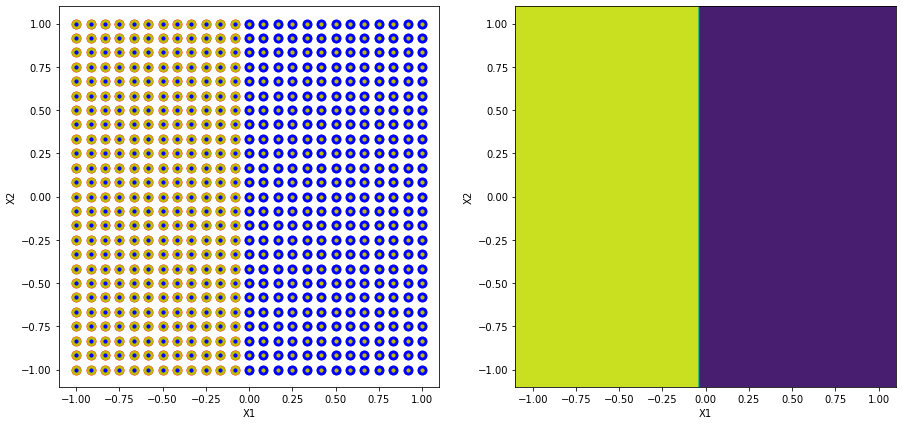

In [ ]:
clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0
                                 ,loss='exponential'
                                ).fit(df1[['X1','X2']],df1['Y'],sample_weight=df1['weight'])

_,ax = plt.subplots(1,2,figsize=(15,7))
#plot_contours(ax)
plot_sample(ax[0],df1)
plot_contours(ax[1], clf2,-1)

In [ ]:
clf2.decision_function(df1[['X1','X2']])

array([ 2.19722458,  2.19722458,  2.19722458, ..., -2.19722458,
       -2.19722458, -2.19722458])

In [ ]:
clf2.predict_proba(df1[['X1','X2']])

array([[0.1, 0.9],
       [0.1, 0.9],
       [0.1, 0.9],
       ...,
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1]])

In [ ]:
1/(1+np.exp(-clf2.decision_function(df1[['X1','X2']])))

array([0.9, 0.9, 0.9, ..., 0.1, 0.1, 0.1])

In [ ]:
clf2.decision_function(df1[['X1','X2']])

array([ 1.09861229,  1.09861229,  1.09861229, ..., -1.09861229,
       -1.09861229, -1.09861229])

In [ ]:
clf2.predict_proba(df1[['X1','X2']])

array([[0.1, 0.9],
       [0.1, 0.9],
       [0.1, 0.9],
       ...,
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1]])

In [ ]:
1/(1+np.exp(-2*clf2.decision_function(df1[['X1','X2']])))

array([0.9, 0.9, 0.9, ..., 0.1, 0.1, 0.1])

In [ ]:
df1

,X1,X2,Y,area,weight
0,-1.000000,-1.0,0,1,0.1
1,-0.916667,-1.0,0,1,0.1
2,-0.833333,-1.0,0,1,0.1
3,-0.750000,-1.0,0,1,0.1
4,-0.666667,-1.0,0,1,0.1
...,...,...,...,...,...
1245,0.666667,1.0,1,0,0.1
1246,0.750000,1.0,1,0,0.1
1247,0.833333,1.0,1,0,0.1
1248,0.916667,1.0,1,0,0.1


In [ ]:
(clf2.predict_proba(df1[['X1','X2']])[:,1] - (df1['weight']*df1['Y'] + (1-df1['weight'])*(1-df1['Y']))).abs().mean()

1.8368639942423217e-15

In [ ]:
pa = np.array([(p[:,1] - (df1['weight']*df1['Y'] + (1-df1['weight'])*(1-df1['Y']))).abs().mean()
          for p in clf2.staged_predict_proba(df1[['X1','X2']])])

In [ ]:
pb = np.array([(p[:,1] - (df1['weight']*df1['Y'] + (1-df1['weight'])*(1-df1['Y']))).abs().mean()
          for p in clf2.staged_predict_proba(df1[['X1','X2']])])

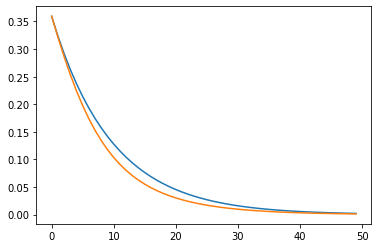

In [ ]:
plt.plot(pa[:50])
plt.plot(pb[:50])

In [ ]:
pb = np.array([(p[:,1] - (df['weight']*df['Y'] + (1-df['weight'])*(1-df['Y']))).abs().mean()
          for p in clf1.staged_predict_proba(df[['X1','X2']])])

In [ ]:
pa = np.array([(p[:,1] - (df['weight']*df['Y'] + (1-df['weight'])*(1-df['Y']))).abs().mean()
          for p in clf1.staged_predict_proba(df[['X1','X2']])])

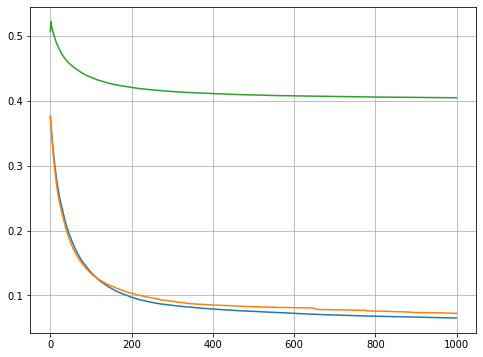

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(pa)#[:250])
plt.plot(pb)#[:250])
plt.plot(pc)
plt.grid()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0),
                          n_estimators=1000, learning_rate=0.1, random_state=0
                                # ,algorithm='SAMME'
                                ).fit(df[['X1','X2']].to_numpy(),df['Y'].to_numpy(),sample_weight=df['weight'].to_numpy())

pc = np.array([(p[:,0] - (df['weight']*df['Y'] + (1-df['weight'])*(1-df['Y']))).abs().mean()
          for p in clf1.staged_predict_proba(df[['X1','X2']].to_numpy())])

In [ ]:
clf1.predict_proba(df[['X1','X2']])

c:\python38\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


array([[0.50637595, 0.49362405],
       [0.50637595, 0.49362405],
       [0.50637595, 0.49362405],
       ...,
       [0.50649487, 0.49350513],
       [0.50649487, 0.49350513],
       [0.50649487, 0.49350513]])

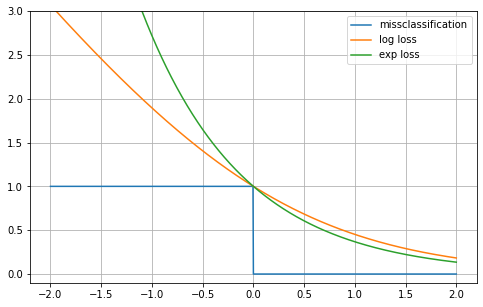

In [ ]:
XX = np.linspace(-2,2,1001)
plt.figure(figsize=(8,5))
plt.plot(XX,(XX<0).astype(int),label='missclassification')
plt.plot(XX,np.log(1+np.exp(-XX))/np.log(2),label='log loss')
plt.plot(XX,np.exp(-XX),label='exp loss')
plt.ylim((-0.1,3))
plt.grid()
plt.legend()
plt.savefig('boost_losses.png', dpi=150, bbox_inches='tight')